In [1]:
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_pickle('../data/FormattedData_wPainAndOA.pkl')
df

,Fx,Fy,Fz,FPL,APL,EPL,EPB,DIO,ADP,OPP,FPB,Subject,Event,Frame,Pain_Cohort,Eaton_Litter
0,0.346711,0.283910,-2.086856,0.302559,0.115935,0.087088,0.048929,0.001397,0.053171,0.027892,0.321829,AO31,1,0,1,3
1,0.334350,0.272250,-2.087275,0.302559,0.115935,0.087088,0.048992,0.001556,0.053171,0.028178,0.322389,AO31,1,1,1,3
2,0.367885,0.285303,-2.111033,0.302559,0.115935,0.087088,0.049063,0.001717,0.053171,0.028445,0.322978,AO31,1,2,1,3
3,0.371264,0.277671,-2.151635,0.302559,0.115935,0.087088,0.049127,0.001879,0.053171,0.028732,0.323635,AO31,1,3,1,3
4,0.370315,0.278336,-2.163308,0.302559,0.115935,0.087088,0.049192,0.002044,0.053171,0.029015,0.324294,AO31,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.257240,-0.064174,-0.951621,0.025482,0.194398,0.000022,0.221204,0.001004,0.001260,0.000000,0.000258,KE58,3,995,0,1
996,-0.248619,-0.076683,-0.936236,0.024978,0.192990,0.000023,0.221275,0.000989,0.001250,0.000000,0.000254,KE58,3,996,0,1
997,-0.258259,-0.062577,-0.935968,0.024459,0.191562,0.000023,0.221357,0.000973,0.001241,0.000000,0.000249,KE58,3,997,0,1
998,-0.259474,-0.098302,-0.986170,0.023970,0.190115,0.000023,0.221450,0.000959,0.001238,0.000000,0.000244,KE58,3,998,0,1


In [12]:

def get_data_by_subject_and_event(df):
    groups = df.groupby(['Subject', 'Event'])
    Y = []
    X = []
    subject = []
    for name, group in groups:
        x_cols = ['Fx', 'Fy', 'Fz', 'FPL', 'APL', 'EPL', 'EPB', 'DIO', 'ADP', 'OPP', 'FPB', 'Frame']
        X.append(group[x_cols].to_numpy().reshape(1, -1))
        pain_mean = group['Pain_Cohort'].mean()
        Eaton_mean = group['Eaton_Litter'].mean()
        Y.append(np.array([pain_mean, Eaton_mean]).reshape(1, -1))
        subject.append(name[0])
    return np.vstack(X), np.vstack(Y), np.array(subject)

scaler = MinMaxScaler()
X, Y, subjects = get_data_by_subject_and_event(df)
subjects = pd.get_dummies(subjects).to_numpy()
X = np.hstack((X, subjects))
X = scaler.fit_transform(X)
X.shape, Y.shape, subjects

((30, 12010),
 (30, 2),
 array([[ True, False, False, False, False, False, False, False, False,
         False],
        [ True, False, False, False, False, False, False, False, False,
         False],
        [ True, False, False, False, False, False, False, False, False,
         False],
        [False,  True, False, False, False, False, False, False, False,
         False],
        [False,  True, False, False, False, False, False, False, False,
         False],
        [False,  True, False, False, False, False, False, False, False,
         False],
        [False, False,  True, False, False, False, False, False, False,
         False],
        [False, False,  True, False, False, False, False, False, False,
         False],
        [False, False,  True, False, False, False, False, False, False,
         False],
        [False, False, False,  True, False, False, False, False, False,
         False],
        [False, False, False,  True, False, False, False, False, False,
         False

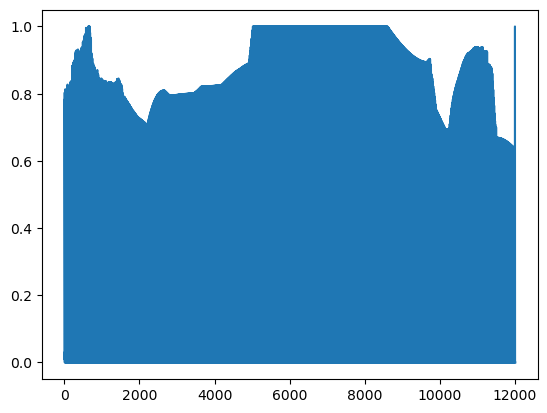

In [13]:
plt.plot(X[0])


(array([ 6.,  0.,  0.,  6.,  0.,  0., 12.,  0.,  0.,  6.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

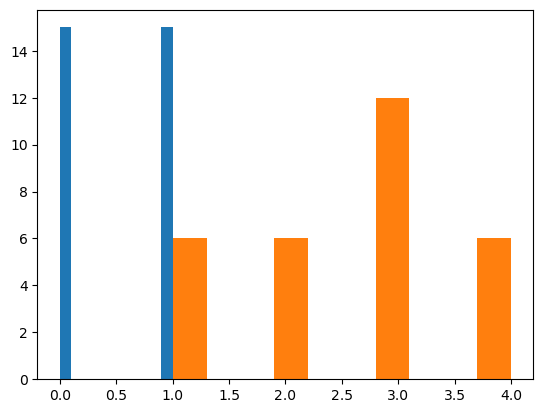

In [14]:
plt.hist(Y[:,0])
plt.hist(Y[:,1])

In [15]:
nmf = NMF(n_components=2, init='random', random_state=0)
W = nmf.fit_transform(X)
H = nmf.components_
W.shape, H.shape

((30, 2), (2, 12010))

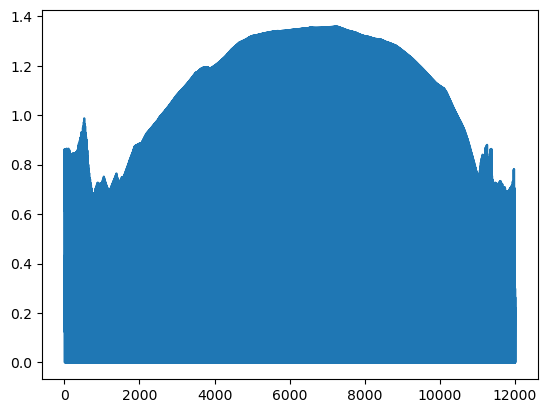

In [16]:
# visualize the components of the NMF
plt.plot(H[0])

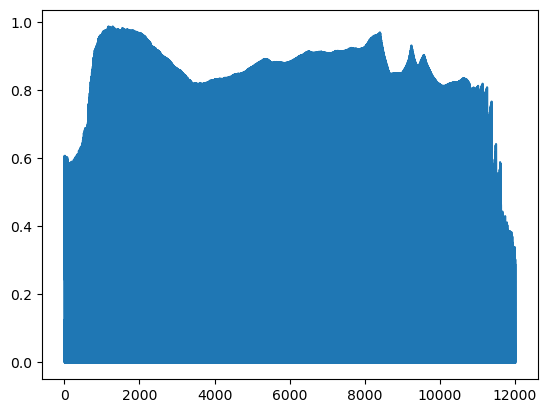

In [17]:
# visualize the components of the NMF
plt.plot(H[1])

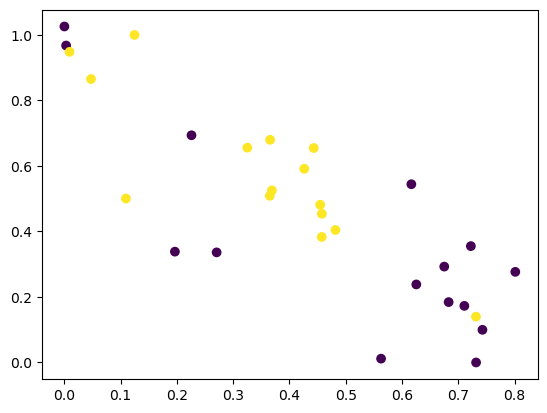

In [18]:
plt.scatter(W[:,0], W[:,1], c=Y[:,0])

c:\Users\efons\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\efons\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.3

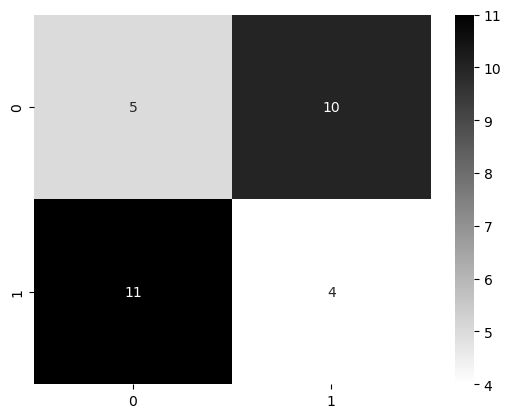

In [28]:
# kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(W)
# score the kmeans clustering
kmeans.score(W, Y[:,0])
# make a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y[:,0], kmeans.labels_)
# visualize the confusion matrix
import seaborn as sns

sns.heatmap(confusion_matrix(Y[:,0], kmeans.labels_), annot=True, cmap='binary')
# print the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y[:,0], kmeans.labels_)

In [29]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = W[:, 0].min() - .5, W[:, 0].max() + .5
    y_min, y_max = W[:, 1].min() - .5, W[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(W[:, 0], W[:, 1], c=Y[:,0], cmap=plt.cm.Spectral)
    plt.show()


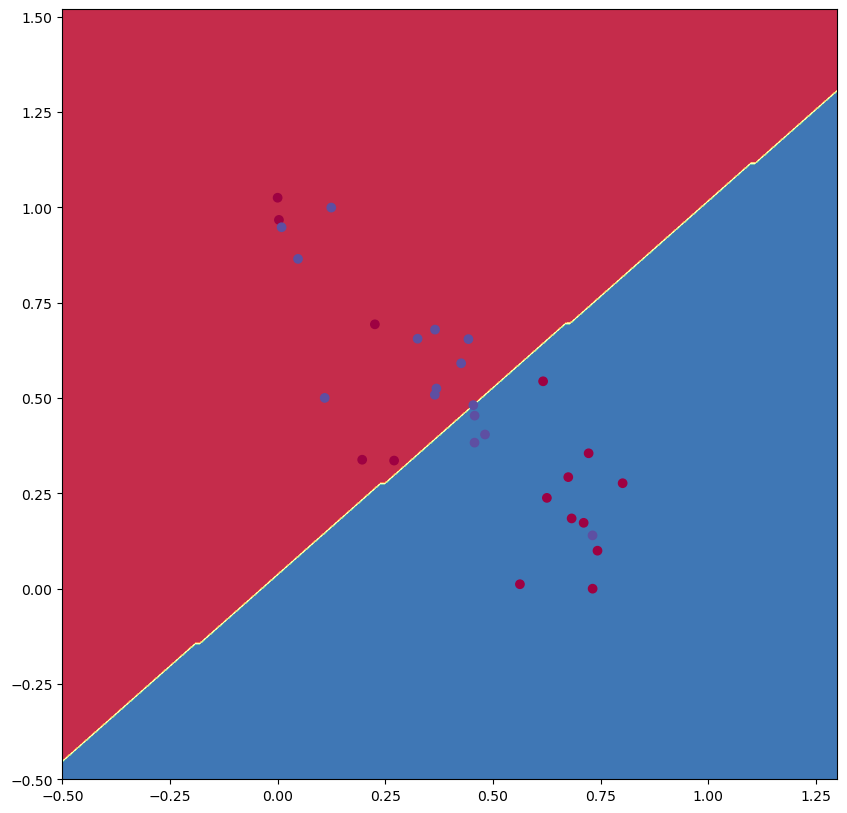

In [30]:
plot_decision_boundary(lambda x: kmeans.predict(x))

In [31]:
# use a random forest classifier
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(max_depth=2, random_state=0)
reg.fit(W, Y[:,0])
reg.score(W, Y[:,0])

0.9333333333333333

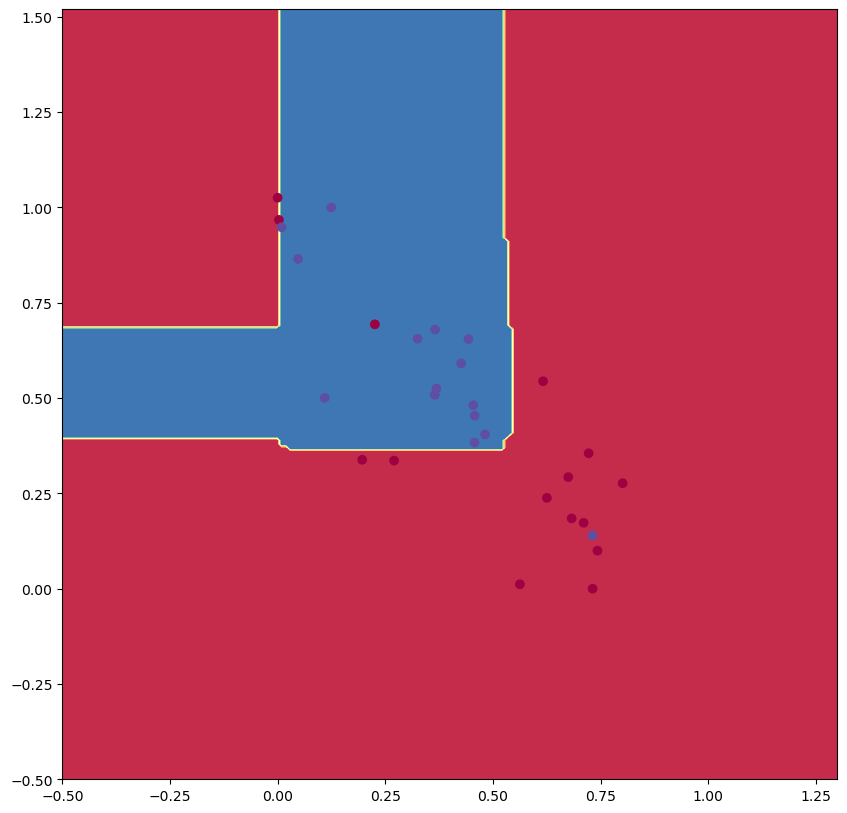

In [32]:
plot_decision_boundary(lambda x: reg.predict(x))

In [33]:
# use logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0).fit(W, Y[:,0])
reg.score(W, Y[:,0])


0.7

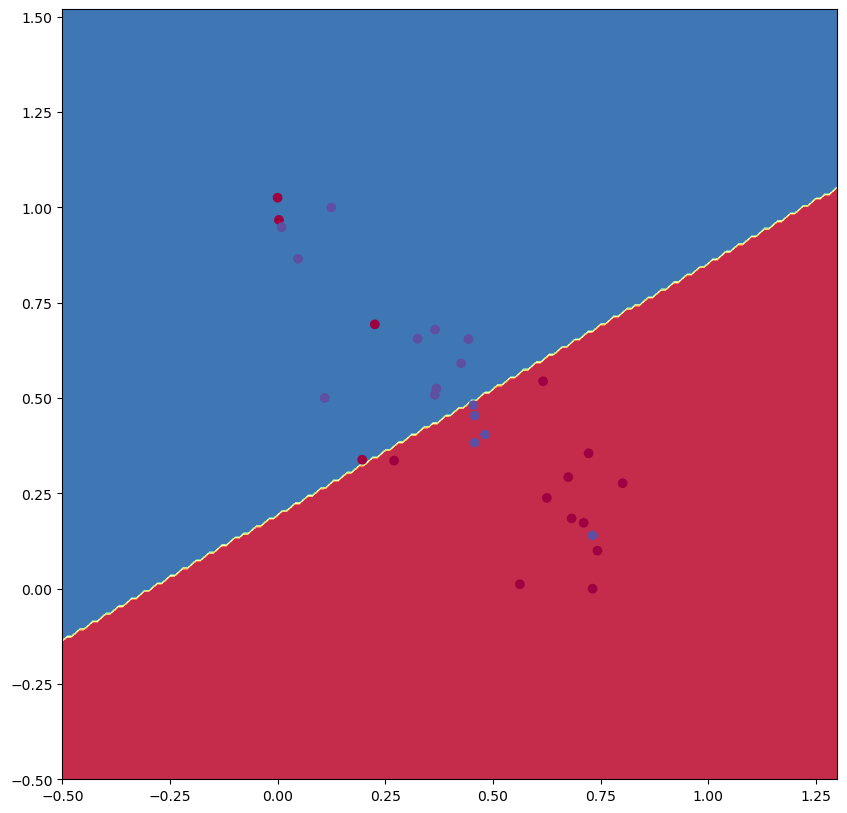

In [34]:
plot_decision_boundary(lambda x: reg.predict(x))

In [35]:
# use a support vector machine
from sklearn import svm
reg = svm.SVC()
reg.fit(W, Y[:,0])
reg.score(W, Y[:,0])

0.7666666666666667

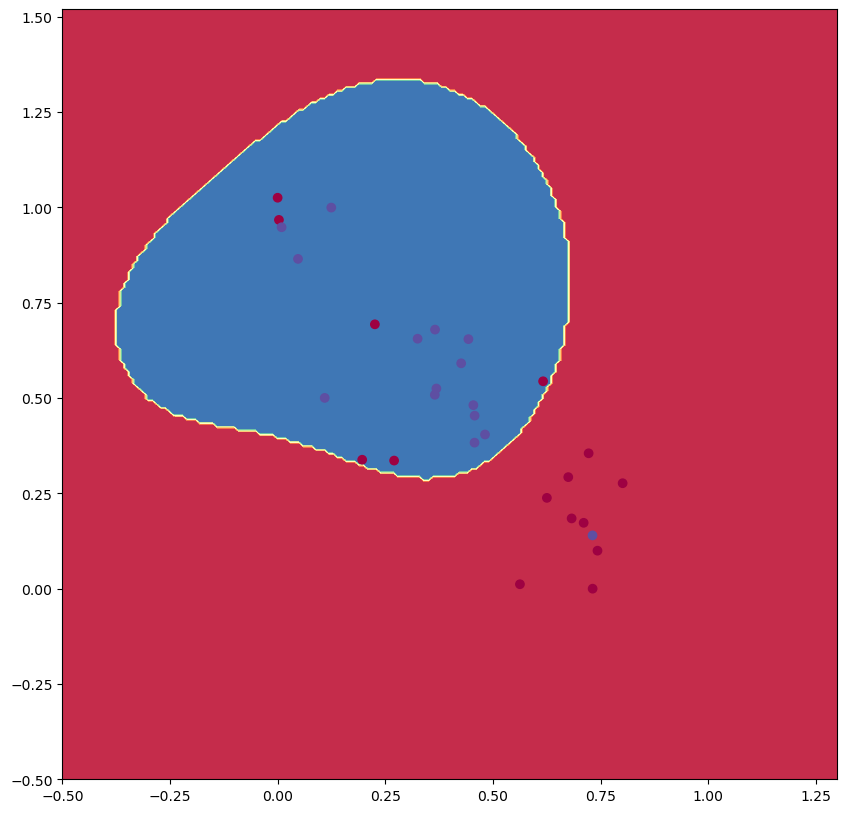

In [36]:
plot_decision_boundary(lambda x: reg.predict(x))

In [40]:
# put the W values into a dataframe
W_df = pd.DataFrame(W)
W_df['Pain'] = Y[:,0]
W_df['Eaton'] = Y[:,1]
# subjects is one hot encoded, convert it back to a single column
W_df['Subject'] = subjects.argmax(axis=1)
W_df


,0,1,Pain,Eaton,Subject
0,0.481664,0.404509,1.0,3.0,0
1,0.454582,0.481495,1.0,3.0,0
2,0.457357,0.383111,1.0,3.0,0
3,0.731403,0.139823,1.0,2.0,1
4,0.457564,0.453978,1.0,2.0,1
5,0.365104,0.508700,1.0,2.0,1
6,0.109367,0.500486,1.0,3.0,2
7,0.426275,0.591245,1.0,3.0,2
8,0.368762,0.525130,1.0,3.0,2
9,0.270549,0.336095,0.0,2.0,3


[0 1 2 3 4 5 6 7 8 9]
0
1.0
1
1.0
2
1.0
3
0.0
4
0.0
5
0.0
6
1.0
7
0.0
8
1.0
9
0.0


C:\Users\efons\AppData\Local\Temp\ipykernel_7692\2209901644.py:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  tmp = kde.gaussian_kde(W_df[W_df['Subject'] == subject][[0,1]].T)
C:\Users\efons\AppData\Local\Temp\ipykernel_7692\2209901644.py:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  tmp = kde.gaussian_kde(W_df[W_df['Subject'] == subject][[0,1]].T)
C:\Users\efons\AppData\Local\Temp\ipykernel_7692\2209901644.py:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  tmp = kde.gaussian_kde(W_df[W_df['Subject'] == subject][[0,1]].T)
C:\Users\efons\AppData\Local\Temp\ipykernel_7692\2209901644.py:10: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  tmp = kde.gaussian

27    0.0
28    0.0
29    0.0
Name: Pain, dtype: float64

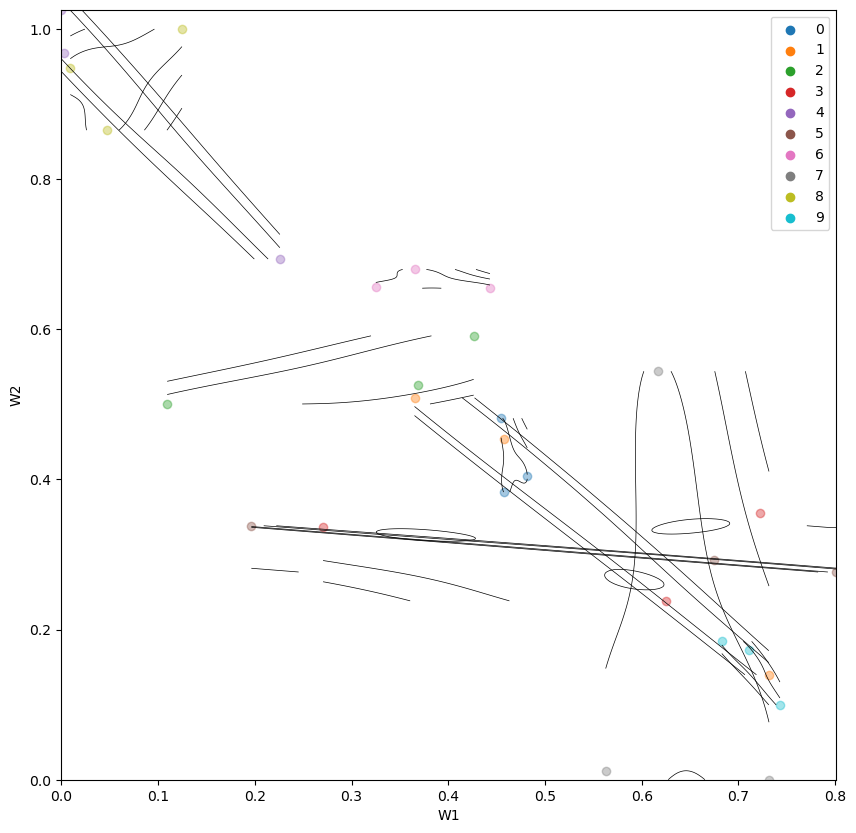

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
from scipy.stats import kde
w_subjects = W_df['Subject'].unique()
print(w_subjects)
# random colors from "tab10"
colors = [i for i in plt.cm.tab10(np.linspace(0, 1, len(w_subjects)))]
for i, subject in enumerate(w_subjects):
    # for each subject plot the kde contour in the W space
    # W is a n x 2 matrix
    tmp = kde.gaussian_kde(W_df[W_df['Subject'] == subject][[0,1]].T)
    # create a grid of points to evaluate the kde at
    xgrid = np.linspace(np.min(W_df[W_df['Subject'] == subject][0]), np.max(W_df[W_df['Subject'] == subject][0]), 100)
    ygrid = np.linspace(np.min(W_df[W_df['Subject'] == subject][1]), np.max(W_df[W_df['Subject'] == subject][1]), 100)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = tmp(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    # plot the contour and make the colors from colors
    #ax.contour(Xgrid, Ygrid, Z.reshape(Xgrid.shape), levels=2, linecolor='black', linewidths=0.5, linestyles='solid', colors=colors[i])
    ax.contour(Xgrid, Ygrid, Z.reshape(Xgrid.shape), levels=2, colors='black', linewidths=0.5, linestyles='solid')
    # plot the points
    ax.scatter(W_df[W_df['Subject'] == subject][0], W_df[W_df['Subject'] == subject][1], label=subject, alpha=0.4, color=colors[i])
    print(subject)
    print(W_df[W_df['Subject'] == subject]['Pain'].mean())
ax.legend()
# make the label markers have full alpha
for i in range(len(ax.get_legend().legendHandles)):
    ax.get_legend().legendHandles[i]._alpha=1
    
ax.set_xlabel('W1')
ax.set_ylabel('W2')

W_df[W_df['Subject'] == subject]['Pain']    


In [83]:
subject

4